In [22]:
#import libraries
import requests
from datetime import datetime as dt
from datetime import timedelta
import pandas as pd
import geopandas

In [42]:
# get events from n days ago
look_back_days = 50

days_ago_dte = dt.now() - timedelta(days=look_back_days)
print (days_ago_dte, type(days_ago_dte)) #gives us a time object
days_ago = days_ago_dte.strftime('%Y-%m-%d')
print (days_ago, type(days_ago)) #converts the time object to string so it can be based into the request

# you can limit the number of records that return from the API
# set to 0 for no limit
limit = 0

#set country to Iraq
country = 'Iraq'

#set event type
event_type = 'Protests'

api_url = 'https://api.acleddata.com/acled/read?terms=accept&event_date={}&event_date_where=%3E=&limit={}&country={}&event_type={}'.format(days_ago, limit, country, event_type)
print (api_url, type(api_url)) #creates request according to ACLED format specifications - p. 13

2020-08-03 16:24:24.917324 <class 'datetime.datetime'>
2020-08-03 <class 'str'>
https://api.acleddata.com/acled/read?terms=accept&event_date=2020-08-03&event_date_where=%3E=&limit=0&country=Iraq&event_type=Protests <class 'str'>


In [43]:
response = requests.get(api_url) # avoid using older user guide that doesn't include terms=accept 
data = response.json()
data.keys()

dict_keys(['status', 'success', 'last_update', 'count', 'messages', 'data', 'filename'])

In [44]:
data['status'], data['success'], data['count'] # see the refrenet for API status codes

(200, True, 322)

In [48]:
data_new = data['data'] #getting just the data 
rows = len(data_new)
print ('ACLED API returned {} rows'.format(rows))

ACLED API returned 322 rows


In [46]:
#convert it into an pandas data frame
acled_data = pd.DataFrame.from_dict(data_new)
acled_data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7229652,368,IRQ26855,26855,2020-09-18,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Kut,32.5056,45.8247,1,Al Mirbad,National,"On 18 September 2020, demonstrators in Kut Cit...",0,1600726971,IRQ
1,7229628,368,IRQ26856,26856,2020-09-18,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Kut,32.5056,45.8247,3,Al Ahad TV,National,"On 18 September 2020, dozens of Teachers and L...",0,1600726971,IRQ
2,7229626,368,IRQ26857,26857,2020-09-18,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Najaf,32.0259,44.3462,1,Al Ahad TV,National,"On 18 September 2020, shop owners of the Souq ...",0,1600726971,IRQ
3,7229879,368,IRQ26851,26851,2020-09-17,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Kerbala,32.5979,44.0165,1,Sotaliraq,National,"On 17 September 2020, dozens of hotel owners d...",0,1600726971,IRQ
4,7229684,368,IRQ26850,26850,2020-09-17,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Al-Faw,29.9742,48.4731,2,Al Mirbad,National,"On 17 September 2020, demonstrators in Al Faw ...",0,1600726971,IRQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,7193082,368,IRQ26369,26369,2020-08-04,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Suwaira,32.9256,44.7758,1,Al Mirbad,National,"On 4 August 2020, a number of residents gather...",0,1599577787,IRQ
318,7193080,368,IRQ26367,26367,2020-08-04,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Nahiyat al Fuhud,30.9697,46.7228,1,Al Mirbad,National,"On 4 August 2020, dozens demonstrated in Nahiy...",0,1599577787,IRQ
319,7193282,368,IRQ26360,26360,2020-08-03,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Akaika,30.9145,46.4759,1,Yaqein,National,"On 3 August 2020, demonstrators in Ukaika, Suq...",0,1599577787,IRQ
320,7193264,368,IRQ26392,26392,2020-08-03,2020,1,Protests,Peaceful protest,Protesters (Iraq),...,Kirkuk,35.4681,44.3922,1,Shafaaq News,National,"On 3 August 2020, graduates from the Faculty o...",0,1599577787,IRQ


In [49]:
#Now, import libraries to pull in shapefile of administrative boundaries
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [50]:
#Open Iraq administrative boundaries from GADM using geopandas
irqadm2 = gpd.read_file(r'/Users/samanthagolden/Desktop/gadm36_IRQ_shp/gadm36_IRQ_2.shp')

<AxesSubplot:>

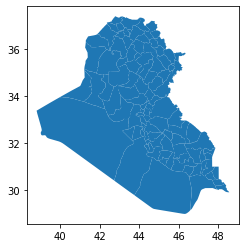

In [51]:
#plot the shapefile (may need to use 'pip install descartes' in terminal)
irqadm2.plot()

In [52]:
irqadm2.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IRQ,Iraq,IRQ.1_1,Al-Anbar,None,IRQ.1.1_1,Abu Ghraib,None,None,None,None,None,None,"POLYGON ((44.28727 33.18921, 44.28334 33.18531..."
1,IRQ,Iraq,IRQ.1_1,Al-Anbar,None,IRQ.1.2_1,Al Fallujah,None,None,None,None,None,None,"POLYGON ((44.10008 32.87399, 44.10274 32.87026..."
2,IRQ,Iraq,IRQ.1_1,Al-Anbar,None,IRQ.1.3_1,Al Haditha,None,None,None,None,None,None,"POLYGON ((42.12704 33.82630, 42.12239 33.82910..."
3,IRQ,Iraq,IRQ.1_1,Al-Anbar,None,IRQ.1.4_1,Al Qa'im,None,None,None,None,None,None,"POLYGON ((41.22286 35.05230, 41.25406 35.05267..."
4,IRQ,Iraq,IRQ.1_1,Al-Anbar,None,IRQ.1.5_1,Anah,None,None,None,None,None,None,"POLYGON ((41.22286 35.05230, 41.22281 35.05319..."


In [53]:
#convert acled data frame to geodataframe with geopandas
gdfacled = geopandas.GeoDataFrame(
    acled_data, geometry=geopandas.points_from_xy(acled_data.longitude, acled_data.latitude))

In [54]:
print(gdfacled.head())

   data_id  iso event_id_cnty event_id_no_cnty  event_date  year  \
0  7229652  368      IRQ26855            26855  2020-09-18  2020   
1  7229628  368      IRQ26856            26856  2020-09-18  2020   
2  7229626  368      IRQ26857            26857  2020-09-18  2020   
3  7229879  368      IRQ26851            26851  2020-09-17  2020   
4  7229684  368      IRQ26850            26850  2020-09-17  2020   

  time_precision event_type    sub_event_type             actor1  ...  \
0              1   Protests  Peaceful protest  Protesters (Iraq)  ...   
1              1   Protests  Peaceful protest  Protesters (Iraq)  ...   
2              1   Protests  Peaceful protest  Protesters (Iraq)  ...   
3              1   Protests  Peaceful protest  Protesters (Iraq)  ...   
4              1   Protests  Peaceful protest  Protesters (Iraq)  ...   

  latitude longitude geo_precision      source source_scale  \
0  32.5056   45.8247             1   Al Mirbad     National   
1  32.5056   45.8247      

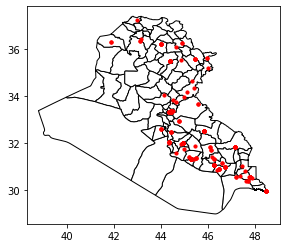

In [56]:
ax = irqadm2.plot(
    color='white', edgecolor='black')

# now plot``GeoDataFrame``.
gdfacled.plot(ax=ax, color='red', markersize = 10)

plt.show()